# Bank Customer Churn

## Part 1: Data Cleaning and Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [1]:
# install pydrive to load data
from google.colab import files
uploaded = files.upload()

Saving bank.data.csv to bank.data.csv


In [3]:
bank_df = pd.read_csv('bank.data.csv')
print(bank_df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [4]:
# Check whether there is any missing value or not.
# No missing value in this dataset.
bank_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Check data infomation
# There are 2 float data type, 9 int data type, and 3 object data type.
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
bank_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
# check the unique values for each column
bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
# understand numerical features
bank_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [9]:
# check the feature distribtion
import matplotlib.pyplot as plt
import seaborn as sns

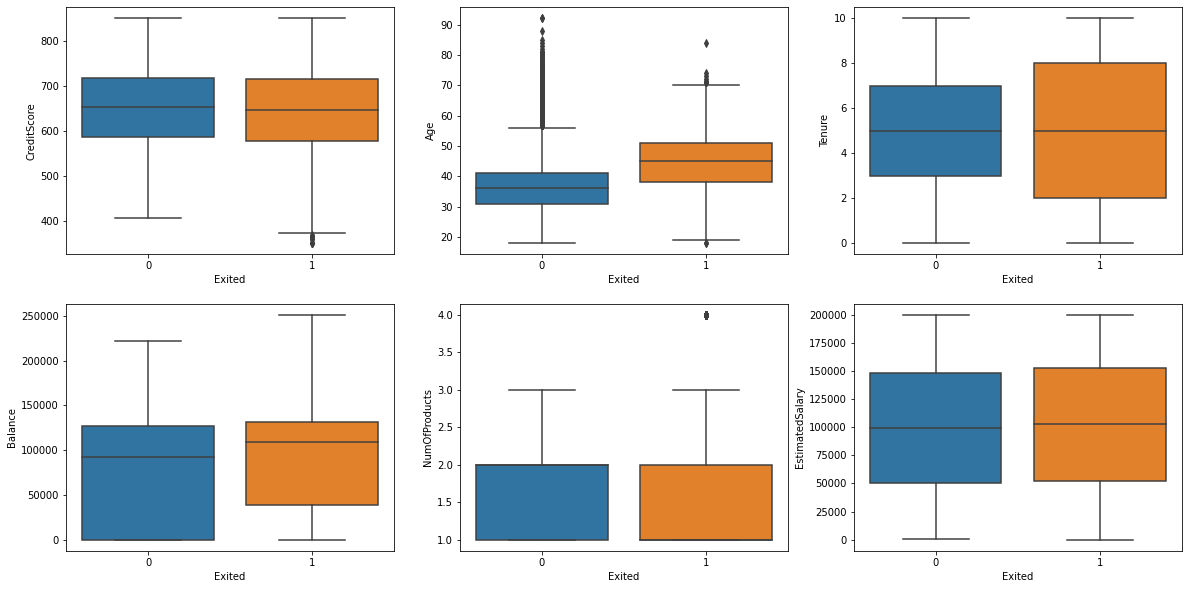

In [10]:
# boxplot for numerical feature
# Plot1: CreditScore does not have much effect on whether to exit
# Plot2: older customers are more likely to exit than younger ones
# Plot3: customers with tenure at 2 and 8 years were more likely to quit, that is, customers 
# using the company's plan for a short time or a long time were more likely to quit, 
# while there was no significant difference for customers with medium years of use
# Plot4: customers with Balance lower than 50,000 are less likely to exit
# Plot5: NumOfProducts does not have much effect on whether to exit
# Plot6: EstimatedSalary does not have much effect on whether to exit

_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=bank_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=bank_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=bank_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='Balance', data=bank_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='NumOfProducts', data=bank_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=bank_df, ax=axss[1][2])

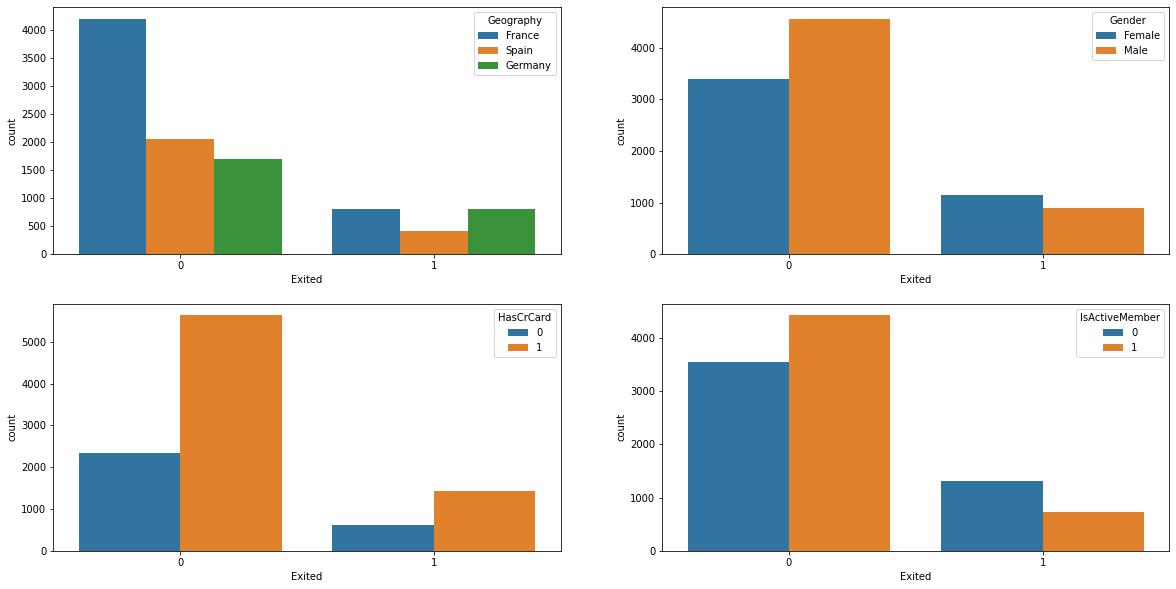

In [11]:
# understand categorical features
# countplot for numerical features
# Plot1: Germany are more likely to exit than others two countries
# Plot2: Female are more likely to exit than Male
# Plot3: HasCrCard does not have much effect on whether to exit
# Plot4: inactive members are more likely exit than active members
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=bank_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=bank_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=bank_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=bank_df, ax=axss[1][1])

In [12]:
#Delete Outlier
#From R, we obtained the outliers located at row 285 and 414
bank_df1 = bank_df.drop(labels = [285, 414], axis = 0)

In [13]:
bank_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   int64  
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   int64  
 11  IsActiveMember   9998 non-null   int64  
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
# drop useless features
# independent variables
to_drop = ["RowNumber", "CustomerId", "Surname", "Exited"]
X = bank_df1.drop(to_drop, axis=1)

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [17]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [18]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

In [19]:
y = bank_df1['Exited']

In [20]:
# Dataset Split
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import datasets

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7498 observation with 10 features
test data has 2500 observation with 10 features


In [22]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [23]:
X_train.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4385,651,France,1.0,35,2,86911.80,1,1,0,174094.24
3922,539,France,1.0,39,3,139153.68,2,1,0,147662.33
1097,543,France,1.0,36,6,0.00,2,1,0,176728.28
5319,645,Germany,1.0,25,1,157404.02,2,1,0,93073.04
2544,668,Germany,1.0,34,5,80242.37,2,0,0,56780.97
3778,579,Spain,0.0,59,3,148021.12,1,1,1,74878.22
3685,695,Spain,0.0,39,5,0.00,2,0,0,102763.69
5603,598,Spain,1.0,39,1,0.00,2,1,0,159130.32
7899,642,France,0.0,40,7,0.00,2,1,0,183963.34
386,611,Spain,1.0,46,6,0.00,2,1,0,45886.33


In [24]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [25]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,651,1.0,35,2,86911.80,1,1,0,174094.24,1.0,0.0,0.0
1,539,1.0,39,3,139153.68,2,1,0,147662.33,1.0,0.0,0.0
2,543,1.0,36,6,0.00,2,1,0,176728.28,1.0,0.0,0.0
3,645,1.0,25,1,157404.02,2,1,0,93073.04,0.0,1.0,0.0
4,668,1.0,34,5,80242.37,2,0,0,56780.97,0.0,1.0,0.0


In [26]:
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.009182,0.001739,0.011650,0.004530,0.026535,-0.004568,0.019216,0.000215,-0.014280,0.003781,0.012760
Gender,-0.009182,1.000000,-0.027910,0.029255,0.015721,-0.020263,0.007444,0.024285,-0.011174,0.001809,-0.021391,0.019446
Age,0.001739,-0.027910,1.000000,-0.012082,0.027333,-0.034163,-0.009269,0.091336,-0.006904,-0.040616,0.047904,-0.001125
Tenure,0.011650,0.029255,-0.012082,1.000000,-0.007967,0.012186,0.028433,-0.033572,0.004720,-0.006228,0.003869,0.003329
Balance,0.004530,0.015721,0.027333,-0.007967,1.000000,-0.308332,-0.015608,-0.006337,0.023042,-0.235687,0.404148,-0.133602
NumOfProducts,0.026535,-0.020263,-0.034163,0.012186,-0.308332,1.000000,0.000488,0.007347,0.013763,0.007338,-0.024054,0.015713
HasCrCard,-0.004568,0.007444,-0.009269,0.028433,-0.015608,0.000488,1.000000,-0.012447,-0.012912,0.012765,0.004374,-0.019215
IsActiveMember,0.019216,0.024285,0.091336,-0.033572,-0.006337,0.007347,-0.012447,1.000000,-0.009003,0.005992,-0.019400,0.012588
EstimatedSalary,0.000215,-0.011174,-0.006904,0.004720,0.023042,0.013763,-0.012912,-0.009003,1.000000,-0.004677,0.014558,-0.009236
Geography_France,-0.014280,0.001809,-0.040616,-0.006228,-0.235687,0.007338,0.012765,0.005992,-0.004677,1.000000,-0.582137,-0.573895


In [27]:
# Standardization (Mean = 0, Standard vairance = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [28]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.006895,1.0,-0.380826,-1.051549,0.168948,-0.914170,0.648963,-1.043908,1.296083,1.0,0.0,0.0
1,-1.152101,1.0,-0.002121,-0.705889,1.005163,0.798585,0.648963,-1.043908,0.837133,1.0,0.0,0.0
2,-1.110709,1.0,-0.286150,0.331093,-1.222213,0.798585,0.648963,-1.043908,1.341820,1.0,0.0,0.0
3,-0.055194,1.0,-1.327588,-1.397209,1.297288,0.798585,0.648963,-1.043908,-0.110729,0.0,1.0,0.0
4,0.182814,1.0,-0.475502,-0.014568,0.062193,0.798585,-1.540921,-1.043908,-0.740887,0.0,1.0,0.0


## Part 2: Model Training


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [30]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

###Logistic Regression

In [31]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=10)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [32]:
print_grid_search_metrics(Grid_LR)

Best score: 0.811815220293725
Best parameters set:
C:0.05
penalty:l1


In [33]:
best_LR_model = Grid_LR.best_estimator_

In [34]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
best_LR_model.score(X_test, y_test)

0.8112

### K Nearest Neighbor

In [36]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [37]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.8470260792167335
Best parameters set:
n_neighbors:9


In [38]:
best_KNN_model = Grid_KNN.best_estimator_

In [39]:
best_KNN_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
best_KNN_model.score(X_test, y_test)

0.8264

###Random Forest

In [41]:
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=10)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [42]:
print_grid_search_metrics(Grid_RF)

Best score: 0.86716261682243
Best parameters set:
max_depth:10
n_estimators:60


In [43]:
best_RF_model = Grid_RF.best_estimator_

In [44]:
best_RF_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
best_RF_model.score(X_test, y_test)

0.856

# Part 3: Model Evaluation

##Part 3.1: Confusion Matrix(Sensitivity, Specificity, Precision, Recall, Accuracy)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    sensitivity = tp / (tp + fn + 0.0)
    specificity = tn / (tn + fp + 0.0)
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Sensitivity is: " + str(sensitivity))
    print ("Specificity is: " + str(specificity))
    print ("Accuracy is: " + str(accuracy))
    print ("Precision is: " + str(precision))
    print ("Recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [47]:
# Confusion matrix, sensitivity, specificty, accuracy, precison and recall for logistic regression, knn and random forest in the training dataset
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_train,best_LR_model.predict(X_train))),
    ("K nearest neighbor", confusion_matrix(y_train, best_KNN_model.predict(X_train))),
    ("Random Forest", confusion_matrix(y_train,best_RF_model.predict(X_train)))
]

draw_confusion_matrices(confusion_matrices)

Logistic Regression
Sensitivity is: 0.20091623036649214
Specificity is: 0.9690117252931323
Accuracy is: 0.8124833288877034
Precision is: 0.6239837398373984
Recall is: 0.20091623036649214

K nearest neighbor
Sensitivity is: 0.47054973821989526
Specificity is: 0.9695142378559464
Accuracy is: 0.8678314217124566
Precision is: 0.7980022197558269
Recall is: 0.47054973821989526

Random Forest
Sensitivity is: 0.5608638743455497
Specificity is: 0.9902847571189279
Accuracy is: 0.9027740730861563
Precision is: 0.9366120218579235
Recall is: 0.5608638743455497



In [48]:
# Confusion matrix, sensitivity, specificty, accuracy, precison and recall for logistic regression, knn and random forest in the test dataset
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Logistic Regression
Sensitivity is: 0.18860510805500982
Specificity is: 0.9703666499246609
Accuracy is: 0.8112
Precision is: 0.6193548387096774
Recall is: 0.18860510805500982

K nearest neighbor
Sensitivity is: 0.34970530451866405
Specificity is: 0.9482672024108488
Accuracy is: 0.8264
Precision is: 0.6334519572953736
Recall is: 0.34970530451866405

Random Forest
Sensitivity is: 0.412573673870334
Specificity is: 0.9693621295831241
Accuracy is: 0.856
Precision is: 0.7749077490774908
Recall is: 0.412573673870334



##Part 3.2: ROC & AUC

###Part 3.2.1: ROC and AUC of RF Model

In [49]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [50]:
best_RF_model.predict_proba(X_test)

array([[0.98162129, 0.01837871],
       [0.91035363, 0.08964637],
       [0.83813113, 0.16186887],
       ...,
       [0.82280918, 0.17719082],
       [0.90474466, 0.09525534],
       [0.84569939, 0.15430061]])

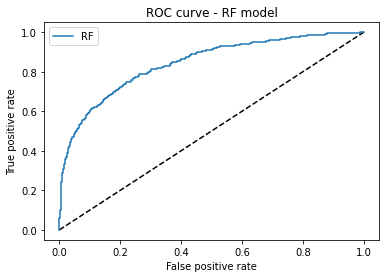

In [51]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [52]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8433076545831487

###Part 3.2.2: ROC and AUC of LR Model

In [53]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [54]:
best_LR_model.predict_proba(X_test)

array([[0.96513066, 0.03486934],
       [0.78758971, 0.21241029],
       [0.8096927 , 0.1903073 ],
       ...,
       [0.6888599 , 0.3111401 ],
       [0.8658532 , 0.1341468 ],
       [0.77214453, 0.22785547]])

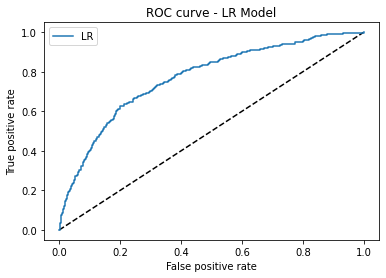

In [55]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [56]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7684274717564995

###Part 3.2.3: ROC and AUC of KNN Model

In [57]:
# Use predict_proba to get the probability results of KNN
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

In [58]:
best_KNN_model.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       ...,
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ]])

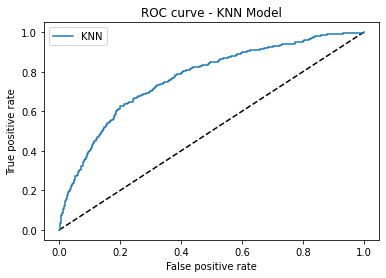

In [59]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [60]:
# AUC score
metrics.auc(fpr_knn,tpr_knn)

0.7939060743877902

###Part 3.2.4: Random Forest Model - Feature Importance Discussion

In [61]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [62]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2399
EstimatedSalary : 0.1455
CreditScore : 0.1431
Balance : 0.1416
NumOfProducts : 0.1274
Tenure : 0.0833
IsActiveMember : 0.0409
Geography_Germany : 0.0232
Gender : 0.0187
HasCrCard : 0.0182
